# Analysis of Text Matching Data, generated from JSTOR Dataset
## Generic version

In [23]:
# Importing libraries
# Restart the Jupyter kernel

import pandas as pd
import numpy as np
#import spacy
import re
import json
#import altair as alt
#new viz library for single-column heatmap
#%pip install matplotlib
#!pip install pyarrow
import pyarrow as pyarrow
import matplotlib.pyplot as plt


import seaborn as sns
#sns.set()
#from nltk.corpus import names
from collections import Counter


# Define startData variable

In [2]:
# ACTION: copy path to results JSONL file here (filename should end "_results_[hyperparameters].jsonl")
# it should be in the correct format of the OS 

#startData = "C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl"

# Alternative approach of infering variables 
### from string path with file name

In [24]:

from pathlib import Path
import platform

# startData = "C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl"
# default values:
name_author='Joyce' 
publicationYear='1922'
text_title='Ulysses'
suffix1='results' 
hyperparSuffix='t2-c3-n2-m3-nostops'
extention='jsonl'
dataDir=Path.cwd()

def make_filename(name_author, publicationYear, text_title, suffix1, hyperparSuffix, extention):
    filename = f"{name_author}_{publicationYear}_{text_title}_{suffix1}_{hyperparSuffix}.{extention}"
    return filename

my_filename= make_filename(name_author, publicationYear, text_title, suffix1, hyperparSuffix, extention)
print(my_filename)

Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl


In [4]:
# assuming the file has a correct path. Path is the workspace_dir with sub_project_dir 'deriveved from filename , with sub dir Source   
# using pathlib
# dataDir is the main directory of all projects of all authors  
from pathlib import Path
    
class ProjectData:
  def __init__(self,the_filename,the_dataDir):
    self.filename = the_filename
    self.dataDir=Path(the_dataDir)
    self.dataDir.mkdir(exist_ok=True)
    self.project_name= self.filename.split('.')[0] 
   
    self.make_project_data()
    self.project_dir=self.dataDir/self.name_author/self.project_name   
    self.project_dir.mkdir(exist_ok=True) 
    
    # these should theroretically already be created in other NB 
    # But  working on an other mahe wth other OS it can be handy 
    # to have these directorties  written in the current OS fashion  
    self.projDir=Path(self.dataDir/self.name_author/self.project_name)
    self.source_dir=Path(self.project_dir/'sourceText') 
    self.source_dir.mkdir(exist_ok=True)

    self.corpus_dir=Path(self.project_dir/'Targetcorpus')
    self.corpus_dir.mkdir(exist_ok=True)
    self.results_dir=Path(self.project_dir/'results')
    self.results_dir.mkdir(exist_ok=True)
    self.path=self.results_dir/self.filename

  def make_project_data(self):
    #Split the_filename into parts based on the underscore character
    parts = self.filename.split('_')
    # The first part is the author's name
    self.name_author = parts[0]
    # The second part is the publication year
    self.publication_year = parts[1]
    # The third part is the book's name
    self.text_title = parts[2]   
    self.suffix1 = parts[3] 
    # The fourth part contains the suffix and the extension
    suffix_and_extension = parts[4]

    # Split the fourth part into the suffix and the extension based on the period character
    suffix_parts = suffix_and_extension.split('.')    
    # The first part is the hyperparSuffix
    self.hyperparSuffix = suffix_parts[0]
    # The second part is the extension
    self.extension = suffix_parts[1]
    self.project_name=f"{self.name_author}_{self.publication_year}_{self.text_title}"
    #self.dataDir=dataDir 

my_filename='Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl'
my_project_data = ProjectData(my_filename,dataDir)


results_dir = my_project_data.results_dir

if results_dir.exists():
    if results_dir.is_dir():
        print(f"{results_dir} exists as a directory.")
    elif results_dir.is_file():
        print(f"{results_dir} exists as a file.")
else:
    print(f"{results_dir} does not exist.")


c:\Users\bdt\Documents\GitHub\quotation-detection\03-analyze-results\Joyce\Joyce_1922_Ulysses\results exists as a directory.


# other approach??  29 feb PT

In [5]:
# Infer naming variables from path 

textTitle = startData.rsplit("_", 4)[-3]
publicationYear = startData.rsplit("_", 4)[-4]
authorSurname = startData.rsplit("_", 4)[-5]
authorSurname = authorSurname.rsplit("/", 1)[-1]
hyperparSuffix = startData.rsplit("_", 4)[-1]
hyperparSuffix = f"_{hyperparSuffix[:-6]}"
dataDir = startData.rsplit("/", 4)[0]

print(f"Author surname: {authorSurname}\nPublication year: {publicationYear}\nText title: {textTitle}\nHyperparameters suffix: {hyperparSuffix}\nData directory:{dataDir}")

projectName = f"{authorSurname}_{publicationYear}_{textTitle}"
sourceDir = f"{dataDir}/{authorSurname}/{publicationYear}_{textTitle}/Source"
corpusDir = f"{dataDir}/{authorSurname}/{publicationYear}_{textTitle}/Corpus"
resultsDir = f"{dataDir}/{authorSurname}/{publicationYear}_{textTitle}/Results"
print(sourceDir) 

NameError: name 'startData' is not defined

# Define startData variable
### Overview of the column names and datatypes in dataframe df

In [25]:

# Define the startData variable
#startData = "C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl"

# Load results as pandas dataframe
filePath=my_project_data.path

if filePath.exists():
    print(f"File {filePath} exists")
else:
    print(f"File {filePath} does not exist")
print(filePath)

# make dataFrams df outof file_path
df = pd.read_json(filePath, lines=True)

# total lenght of the colums in df ( including rows with empty elements)
total_number_of_rows=len(df)
number_of_rows_with_matches=len(df[df['numMatches']>=1])
number_of_rows_without_matches=total_number_of_rows - number_of_rows_with_matches
print(total_number_of_rows)
print(number_of_rows_with_matches)
print(number_of_rows_without_matches)


File c:\Users\bdt\Documents\GitHub\quotation-detection\03-analyze-results\Joyce\Joyce_1922_Ulysses\results\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl exists
c:\Users\bdt\Documents\GitHub\quotation-detection\03-analyze-results\Joyce\Joyce_1922_Ulysses\results\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl
19712
4851
14861


# Explore the kinds of source Categories
### Produce a unique list of all the strings

In [ ]:
flattened_list = [item for sublist in df['sourceCategory'].tolist() if sublist is not None for item in sublist]

#flattened_list = [item for sublist in df['sourceCategory'] for item in sublist]
unique_list = list(dict.fromkeys(flattened_list))


# Check that source Category item is not empty

## to be removed

In [ ]:

is_not_list = df['sourceCategory'].apply(lambda x: not isinstance(x, list))
df_without_lists = is_not_list.to_frame()


### Print:
### No. of items
### Total no. of quotations
### Tally of no. of quotations per item (i.e. from 1 to n)
### Total no. of words quoted
### Tally of no. of words quoted per item (i.e. from 1 to n)
### No. of unique journals
### No. of non-journal items

In [ ]:
# Print:
# No. of items
# Total no. of quotations
# Tally of no. of quotations per item (i.e. from 1 to n)
# Total no. of words quoted
# Tally of no. of words quoted per item (i.e. from 1 to n)
# No. of unique journals
# No. of non-journal items
 
df_columns = df.columns.tolist()
print(df_columns)

no_Items = len(df)
print(f'No of items: {no_Items}')

no_quotatons = df['numMatches'].sum()
print(f'No of quotations: {no_quotatons}')

#Tally of no. of quotations per item (i.e. from 1 to n)

tally = df['numMatches'].value_counts()
n = 10  # Replace 5 with the desired number of tuples
#pirnt  first n tallies of  number of quotations 
first_n_tuples = tally.head(n)
print(first_n_tuples)
df_filtered = df.dropna(subset=['wordCount'])
total_no_of_words_quoted= df_filtered['wordCount'].sum() 
print(f'Total no of words quoted: {total_no_of_words_quoted}')
total_no_of_items=len(df['isPartOf']) 
print(f'Total number of journal items: {total_no_of_journal_items}')

total_no_of_unique_journal_names=len(df['isPartOf'].unique()) 
print(f'Total number of unique journals: {total_no_of_unique_journalnames}')

total_no_of_journal_items = len(df[df['isPartOf'].notna()])
print(f'Total number of journal items: {total_no_of_journal_items}')

print(f'Total number of non journal items: {no_Items - total_no_of_journal_items}')

['datePublished', 'docSubType', 'Year', 'Decade', 'docType', 'doi', 'id', 'identifier', 'isPartOf', 'issueNumber', 'keyphrase', 'language', 'outputFormat', 'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider', 'publicationYear', 'publisher', 'sourceCategory', 'tdmCategory', 'title', 'url', 'wordCount', 'numMatches', 'Locations in A', 'Locations in B', 'creator', 'volumeNumber', 'abstract', 'placeOfPublication', 'subTitle']
No of items: 19712
No of quotations: 16686
numMatches
0    14861
1     3005
2      472
3      252
4      181
5      133
6      121
7      117
8       88
9       68
Name: count, dtype: int64
Total no of words quoted: 132904729
Total number of journal items: 13676
Total number of unique journals: 1234
Total number of journal items: 13676
Total number of non journal items: 6036


# Information about historical range

## OPTIONAL: Setting upper an lower bound of decades

In [ ]:
# OPTIONAL: if you're interested in change of time, it's recommended that you limit your analysis
# to decades for which there is a reasonable number of items. Do you want to do this?

resultsStartYear = 1970
resultsEndYear = 2020

df1= df[(df['Decade'] >= resultsStartYear) & (df['Decade'] <= resultsEndYear)]


#df1=df


# Code to drop entries before resultsStartYear and after resultsEndYear

In [ ]:
# Print:
# Raw count of items per decade
# Bar diagram of items per decade 
# Box plot of item dates/ decades??
# Raw count of quotations per decade
# Bar diagram of quotations per decade  PT
# Box plot of quatations per dates/ decades?? PT

#import matplotlib.pyplot as plt



# Raw count of items per decade

In [ ]:
# Raw count of items per decade

from collections import Counter

counter_selected_Values = Counter(df1['Decade'])
decades= counter_selected_Values.keys()
counts= counter_selected_Values.values()

print('Raw count of items per decade:\n')
print(counter_table_str)


Raw count of items per decade:

 Decade  Count
   2020    120
   1970   2342
   2000   3910
   1980   3316
   1990   4311
   2010   3320


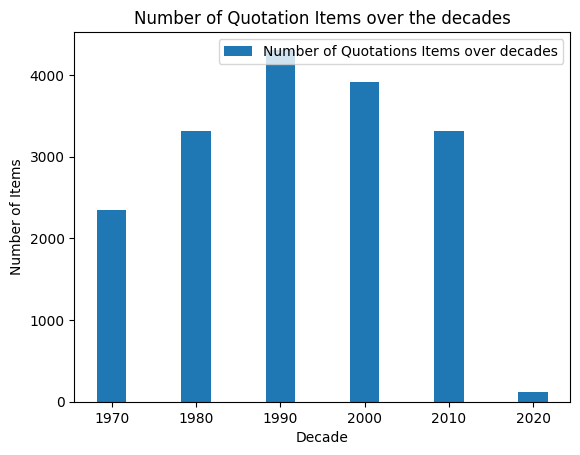

In [ ]:
# Barplot of items per decade

my_plot_bar = plt.bar(decades, counts, width=3.5)
plt.xlabel('Decade')
plt.ylabel('Number of Items')
plt.title('Number of Quotation Items over the decades')
plt.legend(['Number of Quotations Items over decades'])

plt.show()
%matplotlib inline


counter_table = pd.DataFrame(counter_selected_Values.items(), columns=['Decade', 'Count'])
counter_table_str = counter_table.to_string(index=False)




# Boxplot items over decades

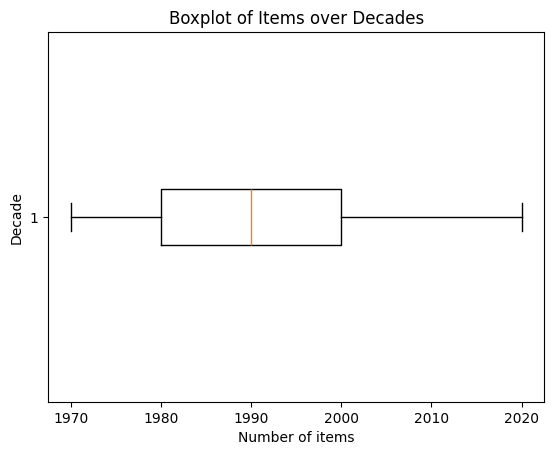

In [ ]:

# Box plot of item dates

plt.boxplot(df1['Decade'], vert=False)
plt.xlabel('Number of items')
plt.ylabel('Decade')
plt.title('Boxplot of Items over Decades')
plt.show()




# Raw counts of quotations per decade

In [ ]:
# raw counts of quotations per decade

df_decade= df1.groupby('Decade')['numMatches'].sum().reset_index()
print('Number of  quotations per decade:\n' )
print(df_decade.to_string(index=False))




Number of  quotations per decade:

 Decade  numMatches
   1970        2471
   1980        2723
   1990        3596
   2000        3078
   2010        2966
   2020         190


# Barplot of quotations per decade

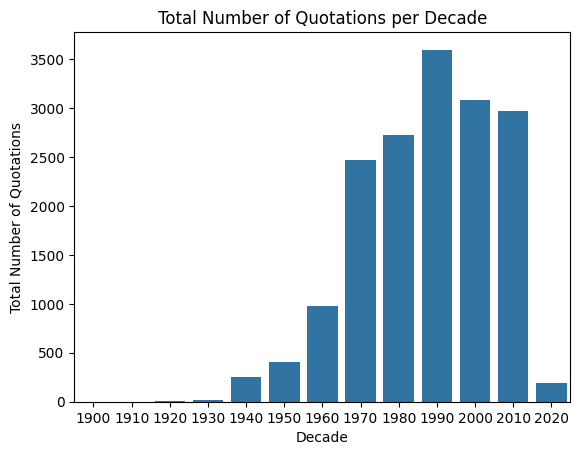

In [ ]:
# Bar plot of quotations per decade

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Decade', y='numMatches', data=df_decade)
plt.xlabel('Decade')
plt.ylabel('Total Number of Quotations')
plt.title('Total Number of Quotations per Decade')
plt.show()



# ACTION: specify how many equally-sized chunks you want to divided the source text into


In [51]:
import pandas as pd
# ACTION: specify how many equally-sized chunks you want to divide the source text into

noOfChunks = 20

# read a txtfile


directory = "C:/Users/bdt/MiddleMarch/"

filename = "Middlemarch.txt"

#has to become 'Ulysses.text'  for using it in combination with ulysses jsorL file

# where is the ulysses text file residing for this project?

with open(directory + filename, 'r') as file:
    text = file.read()

# get len() of textfile

number_of_characters = len(text)
# upperbound of each chunk is defined
list_of_start_positions = list(range(0,number_of_characters, int(number_of_characters/noOfChunks)))

df_Character_Indices = pd.DataFrame({'Index': range(len(list_of_start_positions)), 'Start Position': list_of_start_positions})

#Display the indexed table

print(df_Character_Indices,"\n")
print(f'number_of_characters: {number_of_characters}')
print(f'number of chunks: {noOfChunks}')  





    Index  Start Position
0       0               0
1       1           89673
2       2          179346
3       3          269019
4       4          358692
5       5          448365
6       6          538038
7       7          627711
8       8          717384
9       9          807057
10     10          896730
11     11          986403
12     12         1076076
13     13         1165749
14     14         1255422
15     15         1345095
16     16         1434768
17     17         1524441
18     18         1614114
19     19         1703787
20     20         1793460 

number_of_characters: 1793463
number of chunks: 20


## How many items have quotes from each chunk of the text?

# table
# barplot



[0, 89673, 179346, 269019, 358692, 448365, 538038, 627711, 717384, 807057, 896730, 986403, 1076076, 1165749, 1255422, 1345095, 1434768, 1524441, 1614114, 1703787, 1793460]
    Bin Start Position  Bin Count
0                    0       2209
1                89673       1730
2               179346        864
3               269019       1122
4               358692       1744
5               448365        861
6               538038        846
7               627711        974
8               717384        914
9               807057        688
10              896730        730
11              986403        564
12             1076076        563
13             1165749        551
14             1255422        903
15             1345095        791
16             1434768        632
17             1524441          0
18             1614114          0
19             1703787          0
20             1793460          0


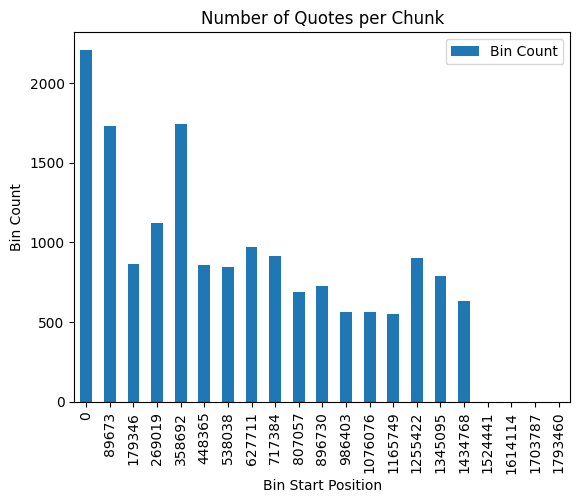

In [78]:
## How many items have quotes from each chunk of the text?
print(list_of_start_positions)
filtered_df = df[df['numMatches'] > 0]
# print filtered_df 
filtered_df.head()
# get list of all starting indices of quotations 
bins = [0] * len(list_of_start_positions)

for location_list in df['Locations in A']:
    if isinstance(location_list, list) and len(location_list) > 0:
        for location in location_list: 
            start_location=location[0]
            length_loop=len(list_of_start_positions)-1
            for j in range(length_loop):
                if (start_location >= list_of_start_positions[j]) and (start_location < list_of_start_positions[j+1]):
                    bins[j] +=1
                    break
                else:
                    if j== length_loop-1:
                        bins[j+1] += 1
                        break





# Create a table of the bins

bins_table = pd.DataFrame({'Bin Start Position': list_of_start_positions, 'Bin Count': bins})
print(bins_table)

# rawcounts table barplot

bins_table.plot(x='Bin Start Position', y='Bin Count', kind='bar')
plt.xlabel('Bin Start Position')
plt.ylabel('Bin Count')
plt.title('Number of Quotes per Chunk')
plt.show()





 # Boxplot of quotations per decade

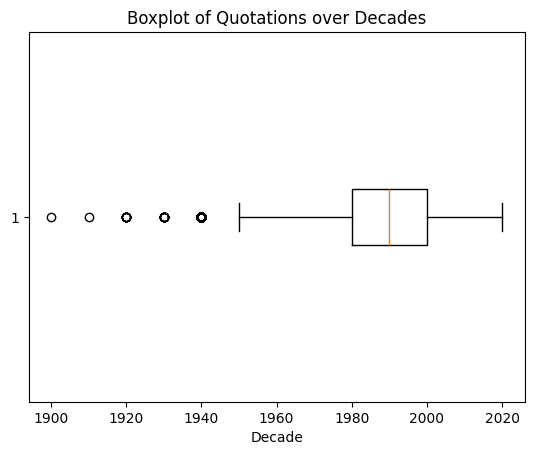

In [ ]:
# boxplot of quotations per decade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_dedade 'Decade' is the column with the dev cedade values,
# and 'numMatches' is now the column with the the total number of quotations per decade
values = []
for _, row in df_decade.iterrows():
    values.extend([row['Decade']] * row['numMatches'])

# OPTIONAL: If boxstats are required:
# the caps are set to 5 % and 95 % )
#boxplot_stats = {
#   'whiskers': np.percentile(values, [25, 75]),
#   'medians': np.median(values),
#    'caps': np.percentile(values, [5, 95]),
#    'fliers': values
#}
#print(boxplot_stats)

plt.boxplot(values,vert=False)
plt.xlabel('Decade')
plt.title('Boxplot of Quotations over Decades')
plt.show()


# Bar plot with a number of journal categories with the most articles on the source  

## In the vertical axes: number of articles citing parts of the primary text  

number of journals with category defined: 19709
number of journals with category not defined: 3


Text(0, 0.5, 'Number of articles')

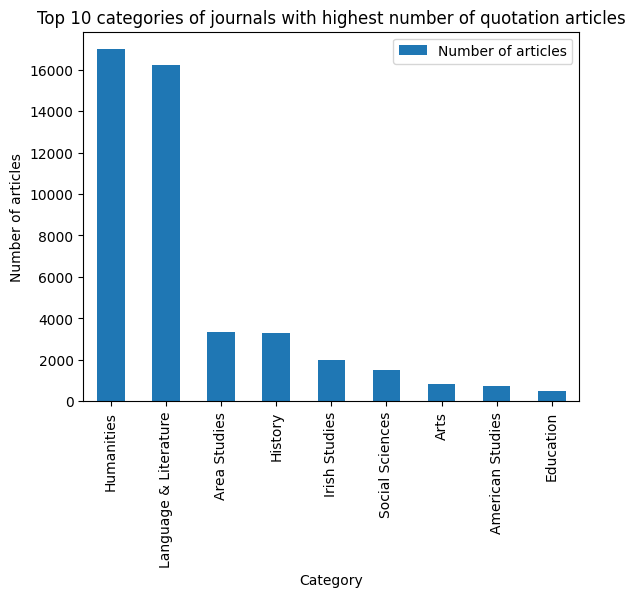

In [ ]:
from itertools import chain
from collections import Counter

# Number of sourceCategory entries with highest counts of quotation articles of the primary text 
top_N_sourceCategory_entries=10

# Filter out None values
df_filtered = df[df['sourceCategory'].notna()]
print ('number of journals with category defined:', len(df_filtered))
print ('number of journals with category not defined:', total_number_of_rows - len(df_filtered))

# Flatten the lists in 'sourceCategory'
flattened_list = list(chain.from_iterable(df_filtered['sourceCategory']))

# Count the occurrences of each value
counts = Counter(flattened_list)

# Convert the result to a DataFrame
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Reset the index
counts_df.reset_index(inplace=True)

# Rename the columns
counts_df.columns = ['Value', 'Count']
#print(counts_df)
#counts_df.plot(x='Value', y='Count', kind='bar')
counts_df_sorted = counts_df.sort_values(by='Count', ascending=False)

# use the n= 10 first, most promenent itens

counts_df_sorted=counts_df_sorted.iloc[:top_N_sourceCategory_entries-1]
counts_df_sorted.head()

#print(counts_df_sorted)
plot1=counts_df_sorted.plot(x='Value', y='Count', label='Number of articles', kind='bar')

plot1.set_title(f'Top {top_N_sourceCategory_entries} categories of journals with highest number of quotation articles')
plot1.set_xlabel('Category')
plot1.set_ylabel('Number of articles')



Text(0.5, 1.0, 'Distribution of articles with or without matchings')

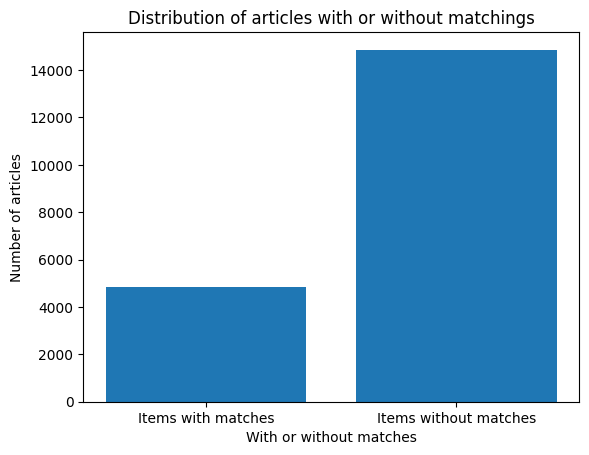

In [ ]:

import matplotlib.pyplot as plt

# Count number of items with/without matches
dict1 = {"Items with matches": len(df[df['numMatches'] >= 1]), "Items without matches": len(df[df['numMatches'] == 0])}

# Create a bar plot of dict1
plt.bar(dict1.keys(), dict1.values())

# Add labels and title
plt.xlabel('With or without matches')
plt.ylabel('Number of articles')
plt.title('Distribution of articles with or without matchings')

# Show the plot
#plt.show()



# Make a counter over decades

Counter({1990: 4311, 2000: 3910, 2010: 3320, 1980: 3316, 1970: 2342, 1960: 1324, 1950: 642, 1940: 225, 1930: 126, 2020: 120, 1920: 51, 1900: 15, 1910: 10})


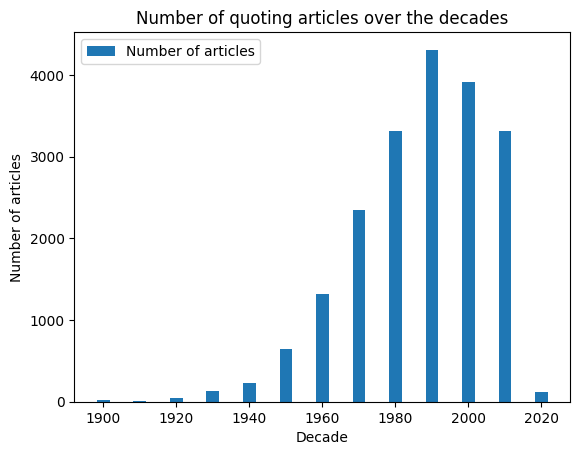

In [ ]:
#import matplotlib.pyplot as plt
from collections import Counter
selected_Values= df['Decade']

counter_selected_Values = Counter(df['Decade'])
my_plot_bar = plt.bar(counter_selected_Values.keys(), counter_selected_Values.values(), width=3.5)
print(counter_selected_Values)
plt.xlabel('Decade')
plt.ylabel('Number of articles')
plt.title('Number of quoting articles over the decades')
plt.legend(['Number of articles'])

plt.show()
%matplotlib inline



# Results 

This  is the section for producing a table of results, comprising 1, Q3, median, first peak when, second peak, when steepest incline, when steepest decline

In [ ]:

import numpy as np
import itertools

#selected _Values is list of 'Decade' element values
#values = [int(value) for value in selected_Values if value != 'Decade']
values = selected_Values.tolist()

# Calculate the quartiles, as a dictionary
quantiles = {
    'Q1': np.percentile(values, 25),
    'Median': np.percentile(values, 50),
    'Q3': np.percentile(values, 75),
}

# Convert the dictionary to a DataFrame
quantiles_df = pd.DataFrame(list(quantiles.items()), columns=['Quantile', 'Value'])
# Convert 'Value' column to integers
quantiles_df['Value'] = quantiles_df['Value'].astype(int)

#print the heading
print('Generic results, statics:\n')

#print(quantiles_df)
print(quantiles_df.to_string(index=False),'\n')

# find peak in counter over values
# Assuming counter_values is your Counter object
counter_values = Counter(values)
# Sort the counter_values by key values numerically
sorted_counts = sorted(counter_values.items(), key=lambda x: int(x[0]))
sorted_counts_values = [count for _, count in sorted_counts]
#print(sorted_counts_values)

#print('sorted_counts:')
#print(sorted_counts)
sum_counts = sum(count for _, count in sorted_counts)
#print("Sum of sorted_counts values:", sum_counts)
cumulative_values = list(itertools.accumulate([count for _, count in sorted_counts]))

#print(cumulative_values)

# Find the Decade with the maximum count

first_tuple_highest_value = max(counter_values.items(), key=lambda x: x[1])

first_key_highest_value = max(counter_values, key=lambda x: counter_values[x])
#print("First key with highest value:", first_tuple_highest_value)

max_count_Decade = first_tuple_highest_value[0]
max_count = first_tuple_highest_value[1]

print('\nDecade of max number of articles:',max_count_Decade, ' Count:', max_count)



# Initialize variables to keep track of the element with the steepest ascent
max_increase = 0
max_decrease = 0
index_max_increase = 0
index_max_decrease = 0
element_with_max_increase = None
element_with_max_decrease = None
list_differences=[]
# Iterate over the counts, starting from the second element
for i in range(1, len(sorted_counts)):
    # Calculate the increase in count compared to the previous element
    increase = sorted_counts_values[i] - sorted_counts_values[i-1]
    list_differences.append(increase)   
    # If this increase is greater than the current maximum, update the maximum and the element
    if increase > max_increase:
        max_increase = increase
        index_max_increase=i
        element_with_max_increase = sorted_counts[i][0]    
    # If this decrease is greater than the current maximum, update the maximum and the element
    if increase < max_decrease:
        max_decrease = increase
        index_max_decrease = i
#print( list_differences)
#print('max_increase:', max_increase, 'index_max_increase:',index_max_increase)
#print('max_decrease:', max_decrease, 'index_max_decrease:',index_max_decrease)

element_with_max_increase=sorted_counts[index_max_increase][0]
element_with_max_decrease=sorted_counts[index_max_decrease][0]
print(f"\nDecade with the steepest ascent: {element_with_max_increase}\nwith an increase of {max_increase}")
print(f"\nDecade with the steepest descent: {element_with_max_decrease}\nwith a decrease of {max_decrease}")

#  test check:



Generic results, statics:

Quantile  Value
      Q1   1980
  Median   1990
      Q3   2000 


Decade of max number of articles: 1990  Count: 4311

Decade with the steepest ascent: 1970
with an increase of 1018

Decade with the steepest descent: 2020
with a decrease of -3200


#filter df isPartOf by filter_list of strings  



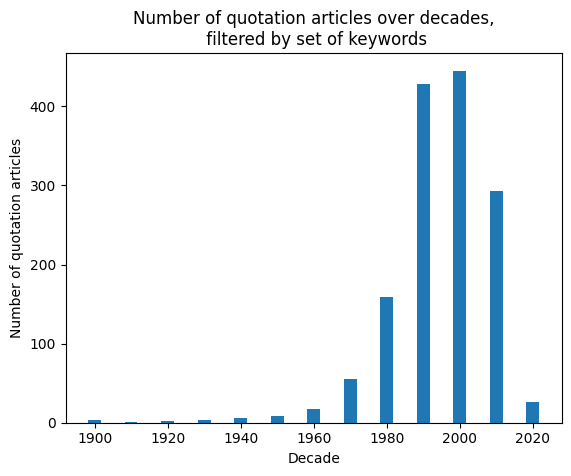

In [ ]:
import matplotlib.pyplot as plt

filter_list=['Philosoph', 'Literar', 'Soci', 'Anthropo'] 

# Filter the rows
filtered_df = df[df['isPartOf'].apply(lambda x: any(value in x for value in filter_list) if x is not None else False)]
decade_Values_filtered=filtered_df['Decade']

counter_selected_Values = Counter(decade_Values_filtered) 


# Get the decades and their counts
decades = list(counter_selected_Values.keys())
counts_filtered = list(counter_selected_Values.values())

# Create a bar chart
plt.bar(decades, counts_filtered,width=3.5)

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Number of quotation articles')
plt.title('Number of quotation articles over decades,\n filtered by set of keywords')

#Show the plot
plt.show()


# Make a plot of number of articles over decades, for two kinds of journals.

### One set: unfiltered, and one set filtered on keywords in journal name ('isPartOf') 

In [ ]:
#make two data sets for the diagram
decades_unfiltered= df['Decade'].sort_values(ascending=True)
counts_decades_unfiltered= list(Counter(decades_unfiltered).values())

### Make a diagram of number of articles for two groups of journals: filtered and unfiltered

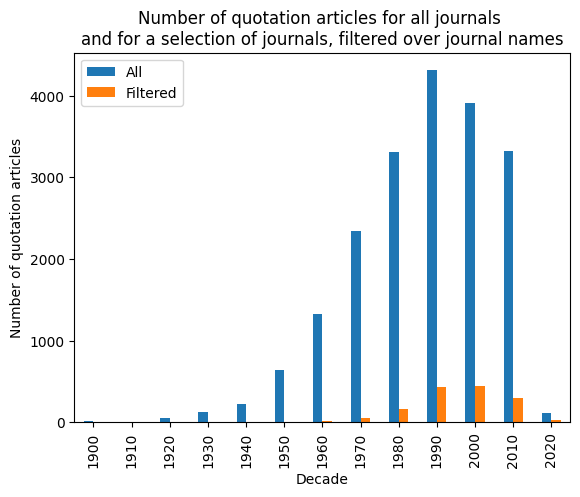

In [ ]:
# dataset1 and dataset2 are the datasets for the diagrams
all_decade_Values = df['Decade']

counter1= Counter(all_decade_Values)
# Sort counter2 by ascending values of Decades in keys
counter2 = counter_selected_Values

def make_bar_plot(counter1, counter2): 

    df_diagram_1 = pd.DataFrame.from_dict(counter1, orient='index', columns=['Count1']).sort_index()
    df_diagram_2 = pd.DataFrame.from_dict(counter2, orient='index', columns=['Count2']).sort_index()

    # Merge the dataframes
    df_diagram = pd.merge(df_diagram_1 ,df_diagram_2 , left_index=True, right_index=True, how='outer')

    # Replace NaN values with 0
    df_diagram = df_diagram.fillna(0)
    my_plot=df_diagram.plot(kind='bar')

    # Plot the datasets

    # Add labels and title
    my_plot.set_xlabel('Decade')
    my_plot.set_ylabel('Number of quotation articles')
    my_plot.set_title('Number of quotation articles for all journals \nand for a selection of journals, filtered over journal names')

    # Add legend
    my_plot.legend(['All', 'Filtered'])

    # Show the plot
    plt.show()

make_bar_plot(counter1, counter2)    


 # Quotations diagrams by Decade for a few datasets, 
 ### filtered by word snippets over the journal names ( such as 'Philosoph','Literar', 'Soci', 'Anthropo'

### diagram of number of quotation articles over decades,
### of journals, using a filter of two word nippets 
### both contained in the journal name ( 'isPartOf')


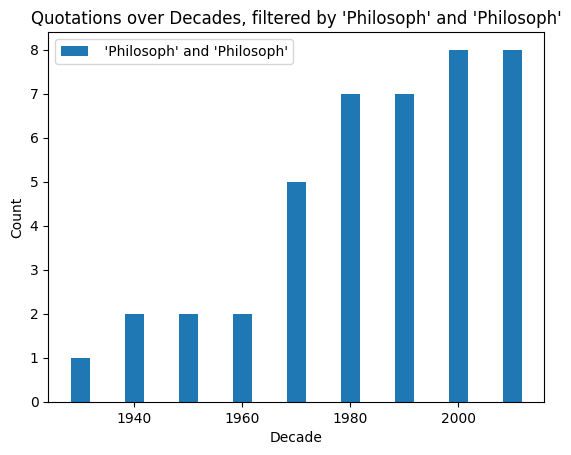

In [ ]:
# Proposed filterlist over 'ísPartOf' collumn

# To Do: find a way to filter over combination of two elements in filterlist
# not yet thoroughly tested because I did not find relevant word snippets 
# with relevant overlap in df 'isPartOf'

filter_list=['Philosoph', 'Literar', 'Soci', 'Anthropo'] 
number_of_word_items=len(filter_list)

Decade_Lowest=1900
Decade_Highest=2020

# Strings is a lost of two items. Defaulkt taken outof  filter_list 

Strings=[filter_list[0], filter_list[0]]
# Create a new figure

import matplotlib.pyplot as plt

def make_overlap_Counter(Strings,df):
   filtered_df = df[df['isPartOf'].apply(lambda x: all(value in x for value in Strings) if x is not None else False)]
   decade_Values_filtered=filtered_df['Decade']
   counter_selected_Values=Counter(decade_Values_filtered)
   return counter_selected_Values
         
def make_bar_diagram_overlap(Strings,counter): 
   diagram_title= f"Quotations over Decades, filtered by '{Strings[0]}' and '{Strings[1]}'"
   
   counts_filtered = list(counter.values())
   decades = list(counter.keys())
   
   plt.figure()
   plt.bar(decades,counts_filtered,label= f" '{ Strings[0]}' and '{Strings[1]}'", width=3.5)   
   # Add labels and title
   plt.xlabel('Decade')
   plt.ylabel('Count')
   plt.title(diagram_title)
   # Show the plot
   plt.legend()
   plt.show()
   
my_Counter=make_overlap_Counter(Strings,df)

make_bar_diagram_overlap(Strings,my_Counter)


## the original cell

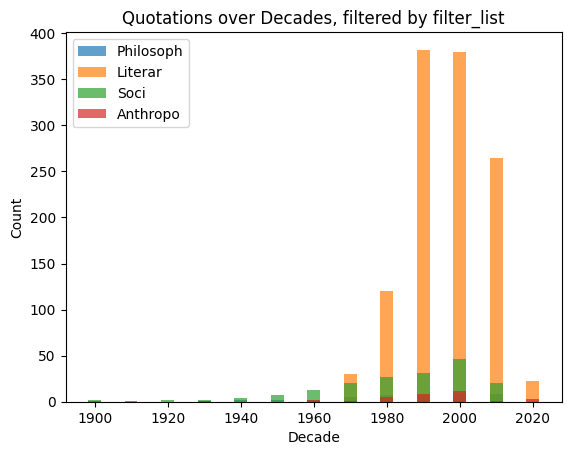

In [ ]:
# Proposed filterlist over 'ísPartOf' collumn

filter_list=['Philosoph', 'Literar', 'Soci', 'Anthropo'] 
number_of_word_items=len(filter_list)

Decade_Lowest=1900
Decade_Highest=2020

# Create a new figure

import matplotlib.pyplot as plt

def diagram_counts_with_keywords_in_isPartOf(filter_list,df):   
   # Create a new figure
   plt.figure()
   def make_list_of_Counters(filter_list,df):
      number_of_word_items=len(filter_list)
      List_of_Counters=[] 
      for i in range(number_of_word_items):
         String = filter_list[i]
         filtered_df = df[df['isPartOf'].str.contains(String, na=False)]   
         decade_Values_filtered=filtered_df['Decade']
         counter_selected_Values=Counter(decade_Values_filtered)
         List_of_Counters.append(counter_selected_Values )     
         decades = list(counter_selected_Values.keys())
      return List_of_Counters   
         
   def make_bar_diagrams(filter_list, List_of_Counters): 
      number_of_word_items=len(List_of_Counters)
      for i in range(number_of_word_items):
         String = filter_list[i]
         
         counts_filtered = list(List_of_Counters[i].values())
      
         #List_of_Counters=make_list_of_Counters(filter_list,df)
         decades = list(List_of_Counters[i].keys())
         counts_filtered = list(List_of_Counters[i].values())
         # Create a bar chart
         plt.bar(decades, counts_filtered, alpha=0.7,label= String, width=3.5)   
   List_of_Counters=make_list_of_Counters(filter_list,df)
   make_bar_diagrams(filter_list,List_of_Counters)
   # Add labels and title
   plt.xlabel('Decade')
   plt.ylabel('Count')
   plt.title('Quotations over Decades, filtered by filter_list')
   # Show the plot
   plt.legend()
   plt.show()
   
   
   
diagram_counts_with_keywords_in_isPartOf(filter_list,df) 

# create a 3D diagram for a group of datasets with same x axis 

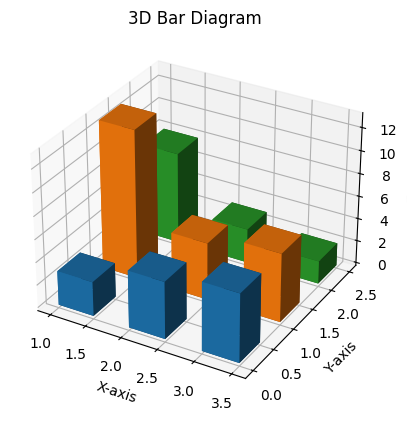

In [ ]:
import numpy as np
#import matplotlib.pyplot as plt2
from mpl_toolkits.mplot3d import Axes3D
#from IPython.display import display

x = [1, 2, 3]
# the datasets
dataset1=[3,5,6]
dataset2=[13,5,6]
dataset3=[8,3,2]

# Create the figure and axes objects

fig = plt2.figure()

ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, np.zeros_like(x), np.zeros_like(x), 0.5, 0.5, dataset1, shade=True)
ax.bar3d(x, np.ones_like(x), np.zeros_like(x), 0.5, 0.5, dataset2, shade=True)
ax.bar3d(x, 2*np.ones_like(x), np.zeros_like(x), 0.5, 0.5, dataset3, shade=True)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Bar Diagram')

# fig.savefig('fig_figure.png')

# Show the figure
plt2.show()


# Creating a diagram of number of quotation articles  
### with or with out filtering over the journal name 
### by set of keyword snippets

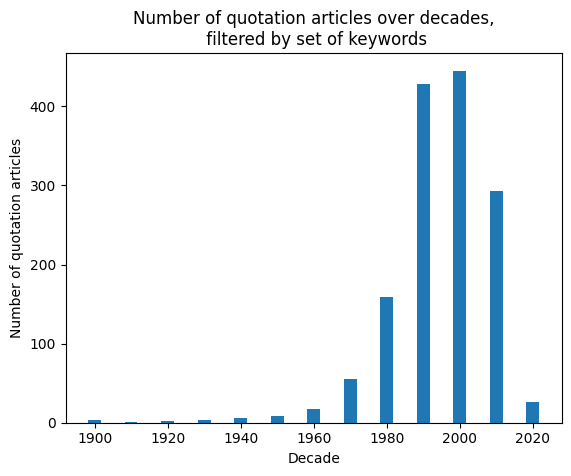

In [ ]:
import matplotlib.pyplot as plt

filter_list=['Philosoph', 'Literar', 'Soci', 'Anthropo'] 

# Filter the rows
filtered_df = df[df['isPartOf'].apply(lambda x: any(value in x for value in filter_list) if x is not None else False)]
decade_Values_filtered=filtered_df['Decade']

counter_selected_Values = Counter(decade_Values_filtered) 


# Get the decades and their counts
decades = list(counter_selected_Values.keys())
counts_filtered = list(counter_selected_Values.values())

# Create a bar chart
plt.bar(decades, counts_filtered,width=3.5)

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Number of quotation articles')
plt.title('Number of quotation articles over decades,\n filtered by set of keywords')

#Show the plot
plt.show()


#Create tables with raw/relative data, quartiles, median, max increase  /decrease  when... etc for all of the journal types

In [ ]:
import numpy as np
# table for  quartiles, median, max increase  /decrease  when... etc for all of the journal types


statistics_df=pd.DataFrame(columns=['key_word','Q1','Median','Q3','max_increase','max_decrease'])

# 
for i in range(number_of_word_items):


    counter= List_of_Counters[i]
    
    sorted_counter = dict(sorted(counter.items(), key=lambda x: x[0]))
    
    counts = list(sorted_counter.values())
    sum_counts = sum(counts)
    #print("Sum of all values in counts:", sum_counts)
     
    counts_cumulative = np.cumsum(counts)
    
    index_q1 = np.where(counts_cumulative >=sum_counts/4 )[0][0]
    #print('Index of Q1    :', index_q1)
    index_median = np.where(counts_cumulative >=sum_counts/2 )[0][0]
    #print('Index of median:', index_median)
    index_q3 = np.where(counts_cumulative >=sum_counts*(3/4))[0][0]
    #print('Index of Q3    :', index_q3)
     
    Decades =  list(sorted_counter.keys())
    #print(sorted_counter)
# Calculate the quartiles
    q1 = Decades[index_q1]
    median = Decades[index_median] 
    q3 = Decades[index_q3]

    # Calculate the quartiles, as a dictionary
    
    quantiles = {
    'Q1':q1,
    'median':median,
    'Q3': q3,
    }

    # Convert the dictionary to a DataFrame
    quantiles_df = pd.DataFrame(list(quantiles.items()), columns=['Quantile', 'Decade'])
    # Convert 'Value' column to integers
    quantiles_df['Decade'] = quantiles_df['Decade'].astype(int)

    # Find the element with the maximum count
    max_count_element = counter.most_common(1)
    # Initialize variables to keep track of the element with the steepest ascent
    max_increase = 0
    max_decrease = 0
    decade_with_max_increase = None
    decade_with_max_decrease = None

    # Iterate over the counts, starting from the second element
    for j in range(1, len(counts)):
        #Calculate the increase in count compared to the previous element
        increase= counts[j] -counts[j-1]
        
        # If this increase is greater than the current maximum, update the maximum and the element
        if increase > max_increase:
           max_increase = increase
           decade_with_max_increase = Decades[j]
        if increase < max_decrease:
           max_decrease = increase
           decade_with_max_decrease = Decades[j]   
    
    row_of_statistics={'key_word':filter_list[i],'Q1':q1,'Median': median,'Q3':q3, 'max_increase':max_increase,'max_decrease':max_decrease }
    statistics_df.loc[len(statistics_df)]=row_of_statistics
    #print(f"Decade with biggest increase : { decade_with_max_increase}\nwith an increase of {max_increase}")

statistics_df.head()

,key_word,Q1,Median,Q3,max_increase,max_decrease
0,Philosoph,1970,1990,2000,3,0
1,Literar,1990,2000,2000,262,-242
2,Soci,1970,1990,2000,15,-26
3,Anthropo,1980,1990,2000,4,-11


# Raw data

'numMatches' is not a column in df


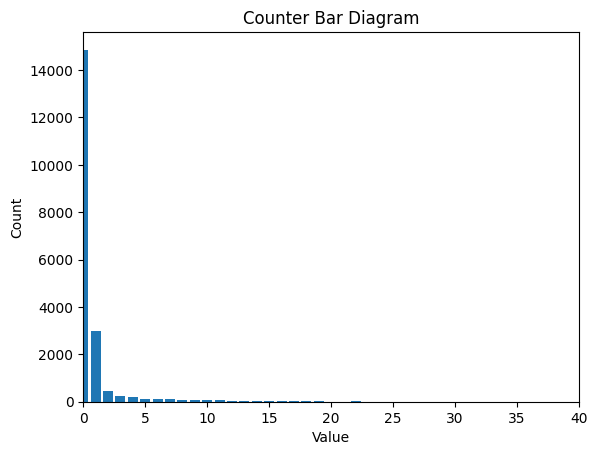

In [ ]:
# building and preseniting raw data of collumns

# for datatype integer or float:
# sum of all values
# mean value
# length of the series
# variance
# max value
# min value

class My_Raw_statistics:
    def __init__(self, name, data):
        self.name = name
        self.data = data
        self.sum = sum(data)
        self.mean = sum(data)/len(data)
        self.length = len(data)
        self.variance = sum((x - self.mean) ** 2 for x in data) / (self.length - 1)
        self.max = max(data)
        self.min = min(data)
        self.counter=Counter(data)
   
   
    def plot_counter(self):   
        plt.bar(self.counter.keys(), self.counter.values())

        # Set the horizontal axis range
        plt.xlim(0, 40)

        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.title('Counter Bar Diagram')

        # Show the plot
        #plt.show()
        return
        
    def __str__(self):
        return f"{self.name}:\nSum: {self.sum}\nMean: {self.mean}\nLength: {self.length}\nVariance: {self.variance}\nMax: {self.max}\nMin: {self.min}\n" 


my_column_name= "numMatches"

if 'numMatches' in df.columns:
    my_series = df[my_column_name][df[my_column_name].notnull()]
    My_Raw_statistics_numMatches=My_Raw_statistics(my_column_name,my_series )
 
    My_Raw_statistics_numMatches.plot_counter()
   
    print("'numMatches' is not a column in df")

# Count number of items with Match status


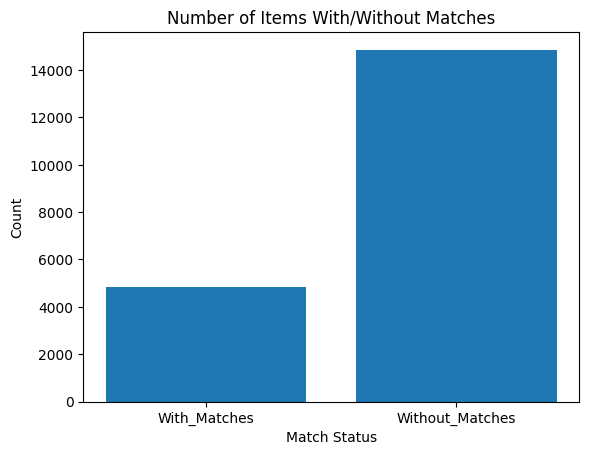

In [ ]:
import matplotlib.pyplot as plt

# Count number of items with/without matches
number_of_rows_with_matches=len(df[df['numMatches']>=1])

#print(f"Items with matches: {len(df[df['numMatches']>=1])}\nItems without matches: {len(df[df['numMatches']==0])}")

counter={
    'With_Matches': number_of_rows_with_matches ,
    'Without_Matches': number_of_rows_without_matches}

# Create a bar diagram
plt.bar(counter.keys(), counter.values())

# Add labels and title
plt.xlabel('Match Status')
plt.ylabel('Count')
plt.title('Number of Items With/Without Matches')

# Show the plot
plt.show()


In [ ]:
# Drop items with no matches from dataframe

df = df[df['numMatches']>=1]
df

,datePublished,docSubType,Year,Decade,docType,doi,id,identifier,isPartOf,issueNumber,...,url,wordCount,numMatches,Locations in A,Locations in B,creator,volumeNumber,abstract,placeOfPublication,subTitle
3,1985-04-01,None,1985,1980,document,10.2307/25477575,http://www.jstor.org/stable/25477575,"[{'name': 'doi', 'value': '10.2307/25477575'},...",None,1,...,http://www.jstor.org/stable/25477575,7507,10,"[[168085, 168181], [168210, 168247], [621989, ...","[[16324, 16420], [16427, 16463], [26079, 26110...",[Corinna del Greco Lobner],15,None,None,None
6,2012-04-01,None,2012,2010,document,10.2307/26636063,http://www.jstor.org/stable/26636063,"[{'name': 'doi', 'value': '10.2307/26636063'},...",James Joyce Literary Supplement,1,...,http://www.jstor.org/stable/26636063,1722,1,"[[285867, 285909]]","[[5289, 5331]]",[Mina Djuric],26,None,None,None
9,1982-12-01,book-review,1982,1980,article,10.2307/23040416,http://www.jstor.org/stable/23040416,"[{'name': 'doi', 'value': '10.2307/23040416'},...",Hermathena,133,...,http://www.jstor.org/stable/23040416,1193,1,"[[152807, 152837]]","[[7169, 7199]]","[DECLAN KIBERD, W. J. MCCORMACK, ALISTAIR STEAD]",None,None,None,None
12,2007-01-01,None,2007,2000,document,10.2307/25571032,http://www.jstor.org/stable/25571032,"[{'name': 'doi', 'value': '10.2307/25571032'},...",None,2,...,http://www.jstor.org/stable/25571032,2707,1,"[[228448, 228489]]","[[6999, 7040]]","[David Spurr, Robert Alter, Desmond Harding]",44,None,None,None
13,1959-01-01,None,1959,1950,document,10.2307/440607,http://www.jstor.org/stable/440607,"[{'name': 'doi', 'value': '10.2307/440607'}, {...",Twentieth Century Literature,4,...,http://www.jstor.org/stable/440607,9699,1,"[[1395983, 1396033]]","[[33997, 34047]]",None,4,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19685,1968-04-01,book-review,1968,1960,article,None,http://www.jstor.org/stable/25486704,"[{'name': 'issn', 'value': '00214183'}, {'name...",James Joyce Quarterly,3,...,http://www.jstor.org/stable/25486704,1558,1,"[[74179, 74268]]","[[9050, 9139]]","[Robert M. Adams, Robert Scholes]",5,None,None,None
19692,1993-07-01,research-article,1993,1990,article,10.2307/25515782,http://www.jstor.org/stable/25515782,"[{'name': 'doi', 'value': '10.2307/25515782'},...",None,None,...,http://www.jstor.org/stable/25515782,4099,1,"[[122279, 122309]]","[[268, 312]]","[George A. Thompson, <suffix>Jr.</suffix>, Ala...",30/31,None,None,None
19693,1987-10-01,None,1987,1980,document,10.2307/25484849,http://www.jstor.org/stable/25484849,"[{'name': 'doi', 'value': '10.2307/25484849'},...",None,1,...,http://www.jstor.org/stable/25484849,745,1,"[[1495141, 1495246]]","[[2640, 2745]]",[Ruth Bauerle],25,None,None,None
19705,1985-12-01,None,1985,1980,document,10.2307/26282265,http://www.jstor.org/stable/26282265,"[{'name': 'doi', 'value': '10.2307/26282265'},...",Modern Fiction Studies,4,...,http://www.jstor.org/stable/26282265,1231,3,"[[77499, 77571], [380646, 380711], [660785, 66...","[[4442, 4513], [5744, 5809], [6151, 6349]]","[MARVIN MAGALANER, James Joyce, Hans Walter Ga...",31,None,None,None


In [ ]:
# Display table with top n journal counts

# ACTION: specify number of journals to display

numJournals = 30

# Generate table of top n journal counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["isPartOf"].value_counts()[0:numJournals])


isPartOf
James Joyce Literary Supplement                                    992
James Joyce Quarterly                                              955
James Joyce Broadsheet                                             792
Modern Fiction Studies                                             472
European Joyce Studies                                             366
Joyce Studies Annual                                               359
Journal of Modern Literature                                       326
Books Ireland                                                      301
Twentieth Century Literature                                       234
The Review of English Studies                                      225
The Modern Language Review                                         207
NOVEL: A Forum on Fiction                                          188
The Sewanee Review                                                 185
Studies in the Novel                                               1

# ??

In [ ]:
inputText = f"{sourceDir}/{projectName}_plaintext.txt"

with open(inputText) as f:
    txt = f.read()

OSError: [Errno 22] Invalid argument: 'C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_results_t2-c3-n2-m3-nostops.jsonl/C:\\Users\\bdt\\Documents\\Joyce/1922_Ulysses/Source/C:\\Users\\bdt\\Documents\\Joyce_1922_Ulysses_plaintext.txt'

In [ ]:
textALength = len(txt)
print(textALength)

NameError: name 'txt' is not defined

In [ ]:
# Make an empty array the size of the text

tally = np.zeros(textALength)
#tally = [0] * textALength

# Read the matched locations from the results dataset, and literally evaluate them into lists. 

locationsInA = df['Locations in A']

# Tally up every time a letter in the text is quoted. 
for article in locationsInA: 
    for locRange in article: 
         for i in range(locRange[0], min(locRange[1]+1, len(tally))):
                tally[i] += 1

NameError: name 'textALength' is not defined

In [ ]:
# Identify top 10 highest frequencies in descending order
topFreqs = list(set(tally))[:-21:-1]

print(topFreqs)

[94.0, 93.0, 92.0, 77.0, 37.0, 35.0, 33.0, 157.0, 28.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 17.0, 16.0, 15.0, 14.0]


In [ ]:
quotedRange = np.where(tally == 412)[0].tolist()
print(quotedRange)

[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [ ]:
print(txt[105054:105973])

 their prison. Then
they start and tremble, they call us by our name, and as soon as we have
recognised their voice the spell is broken. We have delivered them: they
have overcome death and return to share our life.

And so it is with our own past. It is a labour in vain to attempt to
recapture it: all the efforts of our intellect must prove futile. The past
is hidden somewhere outside the realm, beyond the reach of intellect, in
some material object (in the sensation which that material object will
give us) which we do not suspect. And as for that object, it depends on
chance whether we come upon it or not before we ourselves must die.

Many years had elapsed during which nothing of Combray, save what was
comprised in the theatre and the drama of my going to bed there, had any
existence for me, when one day in winter, as I came home, my mother,
seeing that I was cold, offered me some tea, a thing I did no


In [ ]:
if quotedRange[-1] - quotedRange[0] +1 == len(quotedRange):
    print("Continuous range")
else:
    print("Multiple ranges detected")

Multiple ranges detected


In [ ]:
for i in range(2, len(quotedRange)):
    if quotedRange[i] - quotedRange[i-1] != 1:
        print("Multiple ranges detected:")
        splitPoint = i
        firstQuot = quotedRange[:splitPoint]
        secondQuot = quotedRange[splitPoint:]
        print(txt[firstQuot[0]:firstQuot[-1]])
        print(txt[secondQuot[0]:secondQuot[-1]])
        break
else:
    print("Continuous range")

TypeError: 'numpy.float64' object is not callable

In [ ]:
for range in topFreqs:
    npRange = np.where(tally == range)[0]
    quotedRange = npRange.tolist()
    quotedExcerpt = txt[quotedRange[0]:quotedRange[-1]]
    print(f"Quoted {range} times: {quotedExcerpt}\n")

Quoted 114.0 times: there are many

Quoted 110.0 times: others

Quoted 85.0 times: du
Bois-de

Quoted 52.0 times: Boulogne

Quoted 45.0 times: Place de la Concorde

Quoted 43.0 times: years have passed

Quoted 42.0 times: Avenue

Quoted 38.0 times: since that night. The wall of the staircase,
up which I had watched the light of his candle gradually climb, was long
ago demolished. And in myself, too, many things have perished which, I
imagined, would last for ever, and new structures have arisen, giving
birth to new sorrows and new joys which in those days I could not have
foreseen, just as now the old are difficult of comprehension. It is a long
time, too, since my father has been able to tell Mamma to "Go with the
child." Never again will such hours be possible for me. But of late I have
been increasingly able to catch, if I listen attentively, the sound of the
sobs which I had the strength to control in my father's presence, and
which broke out only when I found myself alone with Mam

In [ ]:
# Identify selected frequencies in descending order
selectedFreqs = list(set(tally))[-22:-9]

print(selectedFreqs)

In [ ]:
for range in selectedFreqs:
    npRange = np.where(tally == range)[0]
    quotedRange = npRange.tolist()
    quotedExcerpt = txt[quotedRange[0]:quotedRange[-1]]
    print(f"Quoted {range} times: indices  
          {quotedExcerpt}\n")

In [ ]:
# Get page locations
pageMatches = txt.split('~')
pageMatches = [match.strip() for match in pageMatches]
len(pageMatches)

## How many articles do we have published in each year? 

In [ ]:
alt.Chart(df).mark_bar().encode(x='Year', y='count()').properties(width=1000)

alt.Chart(...)

# Find all articles quoting a given range

In [ ]:
df[df["Locations in A"].astype(str).str.contains("157027") == True]

,creator,datePublished,Year,Decade,docSubType,docType,id,identifier,isPartOf,issueNumber,...,volumeNumber,wordCount,numMatches,Locations in A,Locations in B,doi,keyphrase,abstract,placeOfPublication,subTitle
34,[Susan L. Martin-Márquez],1995-01-01,1995,1990,research-article,article,http://www.jstor.org/stable/27741246,"[{'name': 'doi', 'value': '10.2307/27741246'},...",None,1/2,...,20,7710,1,"[[157027, 157048]]","[[35828, 35848]]",10.2307/27741246,"[beverly hills, gimferrers, cinema, muerte, on...","In Pere Gimferrer's book of poetry, ""La muerte...",None,None
50,[NICHOLAS BIRNS],2016-01-01,2016,2010,None,document,http://www.jstor.org/stable/26106636,"[{'name': 'doi', 'value': '10.2307/26106636'},...",The Powys Journal,None,...,26,7995,1,"[[157027, 157048]]","[[41182, 41206]]",10.2307/26106636,"[owen glendower, nicholas birns, cowper powys,...",None,None,None
101,[David R. Buchanan],2006-06-01,2006,2000,None,document,http://www.jstor.org/stable/45056340,"[{'name': 'doi', 'value': '10.2307/45056340'},...",Health Education & Behavior,3,...,33,8948,1,"[[157027, 157048]]","[[19012, 19032]]",10.2307/45056340,"[health education, medical model, habermas, re...",This article describes two models for thinking...,None,None
267,[Robert Greer Cohn],1995-10-01,1995,1990,None,document,http://www.jstor.org/stable/20057323,"[{'name': 'doi', 'value': '10.2307/20057323'},...",New Literary History,4,...,26,7314,1,"[[157027, 157048]]","[[30189, 30209]]",10.2307/20057323,"[mallarme, mallarmes wake, literary history, t...",None,None,None
770,"[Pedro Sena Nunes, RACHEL MORGENSTERN-CLARREN]",2013-10-01,2013,2010,None,document,http://www.jstor.org/stable/24365592,"[{'name': 'doi', 'value': '10.2307/24365592'},...",BOMB,125,...,None,4618,1,"[[157027, 157048]]","[[24003, 24023]]",10.2307/24365592,"[tavares, sena nunes, pedro sena, writing, nei...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20882,[NICHOLAS SHEA],2012-03-01,2012,2010,None,document,http://www.jstor.org/stable/23210080,"[{'name': 'doi', 'value': '10.2307/23210080'},...",None,2,...,84,15808,1,"[[157027, 157048]]","[[59047, 59067]]",10.2307/23210080,"[phenomenal, property, phenomenal consciousnes...",Block's well-known distinction between phenome...,None,None
21477,"[Lisa Block de Behar, Virginia Gutiérrez Berner]",2009-12-01,2009,2000,None,document,http://www.jstor.org/stable/41949656,"[{'name': 'doi', 'value': '10.2307/41949656'},...",CR: The New Centennial Review,3,...,9,12190,1,"[[157027, 157048]]","[[39117, 39137]]",10.2307/41949656,None,None,None,None
21564,"[Tom Simone, James Robinson]",2018-10-01,2018,2010,None,document,http://www.jstor.org/stable/26635956,"[{'name': 'doi', 'value': '10.2307/26635956'},...",James Joyce Literary Supplement,2,...,32,4518,1,"[[157027, 157048]]","[[11440, 11460]]",10.2307/26635956,None,None,None,None
21711,[Anthony Vidler],1989-06-01,1989,1980,None,document,http://www.jstor.org/stable/3171151,"[{'name': 'doi', 'value': '10.2307/3171151'}, ...",None,9,...,None,7162,1,"[[157027, 157048]]","[[16186, 16207]]",10.2307/3171151,"[architecture, stirlings, corbusier, schinkel,...",None,None,None


In [ ]:
df2["Locations in A"].iloc[1]

# Divide text into chunks

In [ ]:
def divideBySections(amount):
    text_occurrence, rangeBreakdown, xLabels = {}, [], []

    for i in range(0, amount):
        text_occurrence[str(i)] = 0
        rangeBreakdown.append(((textALength/amount)*(i), (textALength/amount)*(i+1)))
        xLabels.append(f"{i+1}")

    return text_occurrence, rangeBreakdown, xLabels

def plotPortionsOfQuotes(amount):

    text_occurrence, rangeBreakdown, xLabels = divideBySections(amount)

    for index, row in df.iterrows():
        for (quot_start,quot_end) in row['Locations in A']:
            for index,values in enumerate(rangeBreakdown):
                if (values[0]<=quot_start<=values[1]):
                    text_occurrence[str(index)] += 1

    total_occ = sum(text_occurrence.values())
    print(total_occ)
    for (key, val) in text_occurrence.items():
        print(key,val)


    plt.figure(facecolor='white')
    plt.bar(range(len(text_occurrence)), list(text_occurrence.values()),tick_label=xLabels)

    plt.xlabel("Segment of text")
    plt.ylabel("Number of quotations")
    plt.rcParams["figure.figsize"] = (30,10)
    plt.rcParams.update({'font.size': 18})
    plt.title("Number of quotations per segment of text")

    plt.show()


distributionCount = 10
plotPortionsOfQuotes(distributionCount)

# Average Numbers of Quoted Words Per Item

In [ ]:
df['Quoted Words'].describe()

In [ ]:
articlesWithMatches['Quoted Words'].describe()

In [ ]:
len(df[df['Quoted Words'] > 0])

In [ ]:
articlesWithMatches['Quoted Words'].hist()

## Stats about Wordcounts

Average number of words per match, per item: 

In [ ]:
articlesWithMatches['Wordcounts'].apply(np.mean).head()

In [ ]:
articlesWithMatches['Wordcounts'].apply(np.mean).describe()

#### Functions for extracting wordcounts, numbers of quotations for diachronic and synchronic analysis

In [ ]:
def diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations, useWordcounts=True, normalize=True):
    """ Turning on useWordcounts makes it so that it's weighted by wordcount. 
    Turning it off uses raw numbers of quotations. """
    decades = np.arange(decades[0], decades[1], 10)
    # Make a dictionary of decades. 
    # Values are a list of locations.  
    decadeDict = {}
    for i, row in df.iterrows():
        decade = row['Decade']
        locationsAndWordcounts = row['Locations in A with Wordcounts']
        if decade not in decadeDict: 
            decadeDict[decade] = locationsAndWordcounts.copy()
        else: 
            decadeDict[decade] += locationsAndWordcounts.copy()
    # Grab the beginnings of quotes. 
    decadeStartsWeights = {decade: [(item[0][0], item[1]) 
                                    for item in loc] 
                    for decade, loc in decadeDict.items()}
    if useWordcounts: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  weights=[loc[1] for loc in locations],
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    else: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    decadesDF = pd.DataFrame(decadesBinned).T
    #Normalize
    if normalize: 
        decadesDF = decadesDF.div(decadesDF.max(axis=1), axis=0)
    return decadesDF

def countWords(locRange): 
    """ Counts words in middlemarch, given character ranges. """
    chunk = mm[locRange[0]:locRange[1]]
    return len(chunk.split())

def totalWords(locRangeSet): 
    """ Counts total words in a list of location ranges. """
    return sum([countWords(locRange) for locRange in locRangeSet])    
    
def countsPerSet(locRangeSet): 
    """ Returns an augmented location range set that includes word counts. """
    return [(locRange, countWords(locRange))
             for locRange in locRangeSet]
    
def extractWordcounts(locsAndWordcounts): 
    """ 
    Takes pairs of location ranges and wordcounts, 
    and returns just the wordcounts. 
    """
    return [item[1] for item in locsAndWordcounts 
            if len(locsAndWordcounts) > 0]

def synchronicAnalysis(df, bins=chapterLocations, useWordcounts=True): 
    locs = df['Locations in A'].values
    locCounts = [(loc, countWords(loc)) for locSet in locs
              for loc in locSet]
    starts = [loc[0][0] for loc in locCounts]
    counts = [loc[1] for loc in locCounts]
    if useWordcounts: 
        binned = np.histogram(starts, bins=bins, 
                              weights=counts, range=(0, textALength))
    else: 
        binned = np.histogram(starts, bins=bins, 
                              range=(0, textALength))
    binnedDF = pd.Series(binned[0])
    return binnedDF

def plotDiachronicAnalysis(df, save=False, reverse=False): 
    ylabels = [str(int(decade)) for decade in df.index] + ['2020']
    plt.pcolor(df, cmap='gnuplot')
    plt.yticks(np.arange(len(df.index)+1), ylabels)
    plt.gca().invert_yaxis()
    plt.ylabel('Decade')
    plt.xlabel('Chapter')
    plt.gca().set_xlim((0, len(df.T)))
    plt.colorbar(ticks=[])
    if save: 
        plt.savefig('diachronic.png', bboxinches='tight', dpi=300, transparent=True)
    plt.show()
    
def plotSynchronicAnalysis(s, useWordcounts=True): 
    ax = s.plot(kind='bar')
    ax.set_xlabel('Chapter')
    if useWordcounts: 
        ax.set_ylabel('Number of Words Quoted')
    else: 
        ax.set_ylabel('Number of Quotations')
        
def plotSynchronicAnalysisHeatmap(s, useWordcounts=True): 
    vec1=synchronicAnalysis(df, useWordcounts=False)
    fig, ax = plt.subplots()
    sns.color_palette("magma")
    sns.heatmap([vec1])
    ax.set_xlabel('Chapter')
    ax.set_ylabel('Number of Quotations')
    
def plotDiachronicAnalysisBubble(df, save=False, reverse=False):
    ylabels = [str(int(decade)) for decade in df.index] + ['2020'] 
    alt.Chart(df).mark_circle().encode(
    x='Chapter',
    y='Decade',
    size='sum(count):Q'
)

In [ ]:
df['Quoted Words'] = df['Locations in A'].apply(totalWords)

In [ ]:
df['Locations in A with Wordcounts'] = df['Locations in A'].apply(countsPerSet)

In [ ]:
# Verify that the diachronic wordcounts are the same as the synchronic wordcounts
decadeSums = diachronicAnalysis(df, decades=(1700, 2020), useWordcounts=True, normalize=False).sum(axis=1)
decadeSums.sum()

In [ ]:
chapterSums = synchronicAnalysis(df)
chapterSums.sum()

# Quotation Length Statistics

In [ ]:
df['Wordcounts'] = df['Locations in A with Wordcounts'].apply(extractWordcounts)

In [ ]:
wordcounts = []
for countSet in df['Wordcounts'].values: 
    for count in countSet: 
        wordcounts.append(count)

In [ ]:
pd.Series(wordcounts).hist()

# Number of Quotes (and words Quoted) by Chapter

In [ ]:
plotSynchronicAnalysis(synchronicAnalysis(df))

In [ ]:
synchronicAnalysis(df, useWordcounts=True).to_csv('../papers/spring2017-middlemarch-paper/data/num-words-quoted-per-chapter.csv')

### Total number of matches

In [ ]:
allMatches = []
for group in df['Locations in A'].values: 
    for pair in group: 
        allMatches.append(pair)

In [ ]:
len(allMatches)

In [ ]:
plotSynchronicAnalysis(synchronicAnalysis(df, useWordcounts=False), useWordcounts=False)

In [ ]:
quotationsPerChapter = synchronicAnalysis(df, bins=chapterLocations, useWordcounts=False)
quotationsPerChapter

In [ ]:
quotationsPerChapter = pd.DataFrame(quotationsPerChapter, index=range(0,88), columns=['Number of Quotations'])
quotationsPerChapter['Chapter'] = range(0, 88)
quotationsPerChapter

In [ ]:
# Paul T added this line  feb 25. 2023  
import altair as alt

alt.Chart(quotationsPerChapter).mark_circle().encode(x='Chapter:O', size='Number of Quotations:Q').properties(width=1000, height=150)

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(x='Chapter:O', size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=1000, height=150)

In [ ]:
# Redo chart with horizontal labels
alt.Chart(quotationsPerChapter).mark_circle().encode(x=alt.X('Chapter:Q', axis=alt.Axis(title="Chapter", tickMinStep=5,
                                       labelOverlap=False,labelAngle=0)), 
size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=1000,height=150).configure_legend(
    titleFontSize=9,
    labelFontSize=10
)

In [ ]:
alt.Chart(quotationsPerChapter).mark_circle().encode(y='Chapter:O', size=alt.Size('Number of Quotations:Q', scale=alt.Scale(range=[1, 1000]))).properties(width=150)

## Quotations Per Book

In [ ]:
quotationsPerBook = synchronicAnalysis(df, bins=bookLocations, useWordcounts=False)
quotationsPerBook

In [ ]:
quotationsPerBook = pd.DataFrame(quotationsPerBook, index=range(1,9), columns=['Number of Quotations'])
quotationsPerBook['Book'] = range(1, 9)
quotationsPerBook

In [ ]:
alt.Chart(quotationsPerBook).mark_bar().encode(x='Book:O', y='Number of Quotations:Q').properties(width=500)

In [ ]:
alt.Chart(quotationsPerBook).mark_circle().encode(x='Book:O', size=alt.Size('Number of Quotations:Q')).properties(height=150).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
# Redo chart with horizontal labels
alt.Chart(quotationsPerBook).mark_circle().encode(x=alt.X('Book:O', axis=alt.Axis(title="Book", labelAngle=0,)), 
size=alt.Size('Number of Quotations:Q')).properties(height=150).configure_legend(
    titleFontSize=9,
    labelFontSize=10
)

## Raw Number of Quotations Per Chapter

In [ ]:
# Get the raw number of quotations per chapter
# synchronicAnalysis(df, useWordcounts=False).to_csv('../papers/spring2017-middlemarch-paper/data/num-quotations-per-chapter.csv')

In [ ]:
# Adjusted for the number of words in each chapter
ax = (synchronicAnalysis(df) / chapterLengthsSeries).plot(kind='bar')
ax.set_xlabel('Chapter')
ax.set_ylabel('Words Quoted, Normalized')

In [ ]:
plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations).sort_index())

In [ ]:
plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index())

In [ ]:
# Create a one-dimensional heatmap of the synchonic raw number of quotations per chapter, as heatmap
vec1=synchronicAnalysis(df, useWordcounts=False)
fig, ax = plt.subplots()
sns.color_palette("magma")
sns.heatmap([vec1])
ax.set_xlabel('Chapter')
ax.set_ylabel('Number of Quotations')

In [ ]:
# Create a one-dimensional heatmap of the synchonic raw number of quotations per chapter, as heatmap
# INVERTED COLOR SCHEMA
vec1=synchronicAnalysis(df, useWordcounts=False)
fig, ax = plt.subplots()
sns.heatmap([vec1], cmap = 'magma_r')
ax.set_xlabel('Chapter')
ax.set_ylabel('Number of Quotations')

In [ ]:
diaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index()

In [ ]:
diaDFquoteOnly = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()

In [ ]:
plotDiachronicAnalysisBubble(diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations).sort_index())

In [ ]:
synDF = synchronicAnalysis(df, useWordcounts=False)

In [ ]:
synDF.index.name = 'chapter'

In [ ]:
synDF

## Redo chart in Altair

In [ ]:
diaDF.columns.name = 'chapter'
diaDF.index.name = 'decade'

In [ ]:
diaDF

In [ ]:
# Redo with raw quotations, not normalized by decade
diaDFquoteOnly.columns.name ='chapter'
diaDFquoteOnly.index.name = 'decade'

In [ ]:
diaDFquoteOnly

In [ ]:
diaDF.columns

In [ ]:
diaDF['decade'] = diaDF.index

In [ ]:
diaMelted = diaDF.melt(id_vars='decade')

In [ ]:
diaDFquoteOnly['decade'] = diaDFquoteOnly.index

In [ ]:
diaDFquoteOnlyMelted = diaDFquoteOnly.melt(id_vars='decade')

In [ ]:
alt.Chart(diaMelted).mark_rect().encode(x='chapter:O', y='decade:O', color=alt.Color('value', legend=alt.Legend(title="# of Quotations (normalized)"))).properties(width=1000, height=300).configure(background='#eeeeeeff')

In [ ]:
alt.Chart(diaMelted).mark_circle().encode(x='chapter:O', y='decade:O', size=alt.Size('value',  legend=alt.Legend(title="Number of Quotations (normalized)"), scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=1000, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
#Redo Chart to rotate tick marks
alt.Chart(diaMelted).mark_circle().encode(
    x=alt.X('chapter:Q', axis=alt.Axis(tickMinStep=5,
                                       labelOverlap=False,
                                   labelAngle=0)), 
    y=alt.Y('decade:O'), 
    size=alt.Size('value',  legend=alt.Legend(title="Number of Quotations (normalized)"), 
                  scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=1000, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
#Chart with raw quotations
alt.Chart(diaDFquoteOnlyMelted).mark_rect().encode(x='chapter:O', y='decade:O', color='value').properties(width=1000, height=300)

In [ ]:
alt.Chart(diaDFquoteOnlyMelted).mark_circle().encode(x='chapter:O', y='decade:O', size='value').properties(width=1000, height=300)

In [ ]:
booksDiaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=bookLocations).sort_index()
booksDiaDF

In [ ]:
booksDiaDF['decade'] = booksDiaDF.index

In [ ]:
booksMelted = booksDiaDF.melt(id_vars='decade', var_name='book')

In [ ]:
booksMelted.head()

In [ ]:
booksMelted = booksMelted[booksMelted.book != 0]
booksMelted

In [ ]:
alt.Chart(booksMelted).mark_rect().encode(x='book:O', y='decade:O', color=alt.Color('value', legend=alt.Legend(title="# of Quotations (normalized)"))).properties(width=500, height=300).configure(background='#eeeeeeff')

In [ ]:
alt.Chart(booksMelted).mark_circle().encode(x='book:O', y='decade:O', size='value').properties(width=500, height=300)

In [ ]:
alt.Chart(booksMelted).mark_circle().encode(x='book:O', y='decade:O', size=alt.Size('value', legend=alt.Legend(title="Number of Quotations (normalized)"), scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=500, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
#Redo Chart to rotate tick marks
alt.Chart(booksMelted).mark_circle().encode(
    x=alt.X('book:O', axis=alt.Axis(labelOverlap=True,
                                   labelAngle=0)), 
    y=alt.Y('decade:O'), 
    size=alt.Size('value',  legend=alt.Legend(title="Number of Quotations (normalized)"), 
                  scale=alt.Scale(type = 'threshold', domain = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], range =[0, 20, 60, 100, 150, 250, 350, 500, 750, 1000, 1500, 2000,]))).properties(width=500, height=300).configure_legend(
titleFontSize=9,
labelFontSize=10
) 

In [ ]:
def plotDiachronicAnalysisBooks(df, save=False, reverse=False): 
    ylabels = [str(int(decade)) for decade in df.index] + ['2020']
    plt.pcolor(df, cmap='gnuplot')
    plt.yticks(np.arange(len(df.index)+1), ylabels)
    plt.gca().invert_yaxis()
    plt.ylabel('Decade')
    plt.xlabel('Book')
    plt.gca().set_xlim((1, len(df.T)))
    plt.colorbar(ticks=[])
    if save: 
        plt.savefig('diachronic.png', bboxinches='tight', dpi=300, transparent=True)
    plt.show()

plotDiachronicAnalysisBooks(diachronicAnalysis(df, decades=(1950, 2020), bins=bookLocations).sort_index())

In [ ]:
# Export image for publication
# plotDiachronicAnalysis(diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations), save=True)

In [ ]:
# Get the normalized proportion of, say, Chapter 20 in 1950: 
diachronicAnalysis(df)[20][1950]

# By (Guessed) Gender of Author

In [ ]:
maleNames, femaleNames = names.words('male.txt'), names.words('female.txt')
maleNames = [name.lower() for name in maleNames]
femaleNames = [name.lower() for name in femaleNames]

In [ ]:
def guessGender(name): 
    name = name.split()[0].lower() # Grab the first name. 
    if name in maleNames and name in femaleNames: 
        return 'A' #Ambiguous
    elif name in maleNames: 
        return 'M'
    elif name in femaleNames: 
        return 'F'
    else: 
        return 'U'

def averageGender(names): 
    if type(names) != list: 
        return 'U'
    genderGuesses = [guessGender(name) for name in names]
    stats = Counter(genderGuesses).most_common()
    if len(stats) == 1: 
        # Only one author. We can just use that's author's gender guess. 
        return stats[0][0]
    elif stats[0][1] == stats[1][1]: # There's a tie. 
        return 'A' # Ambiguous. 
    else: 
        return stats[0][0] # Return the most common gender. 
        

In [ ]:
df['gender'] = df['author'].apply(averageGender)
dfF = df.loc[df['gender'] == 'F']
dfM = df.loc[df['gender'] == 'M']

In [ ]:
# Differences in citations between genders. 
plotSynchronicAnalysis(synchronicAnalysis(dfM) - synchronicAnalysis(dfF))

# By (Guessed) Country of Publication

In [ ]:
def getFirst(row): 
    if type(row) == list: 
        return row[0]
    else: 
        return row

topPublishers = df['publisher_name'].apply(getFirst).value_counts()

In [ ]:
publishers = topPublishers[:80].index

In [ ]:
publishers = publishers.tolist()

In [ ]:
def getCountry(publisher): 
    brits = ['Oxford University Press', 'Cambridge University Press', 'Modern Humanities Research Association', \
             'BMJ', 'Taylor & Francis, Ltd.', 'Edinburgh University Press', \
             'Royal Society for the Encouragement of Arts, Manufactures and Commerce']
    canadians = ['Victorian Studies Association of Western Canada'] 
    if type(publisher) != list: 
        return 'Unknown'
    publisher = publisher[0]
    if publisher in brits: 
        return 'Britain' 
    elif publisher in canadians or 'Canada' in publisher: 
        return 'Canada' 
    elif 'GmbH' in publisher: 
        return 'Germany'
    elif 'estudios' in publisher: 
        return 'Spain'
    elif 'France' in publisher: 
        return 'France' 
    elif 'Ireland' in publisher: 
        return 'Ireland'
    else: 
        return 'US'

In [ ]:
df['country'] = df['publisher_name'].apply(getCountry)

In [ ]:
df['country'].value_counts()

In [ ]:
dfBrits = df.loc[df['country'] == 'Britain']
dfYanks = df.loc[df['country'] == 'US']
dfCanadians = df.loc[df['country'] == 'Canada']

In [ ]:
# Since British authors are greatly outnumbered in this corpus, we should normalize the data. 
britsHist = synchronicAnalysis(dfBrits) 
normBrits = britsHist.div(britsHist.max())
yanksHist = synchronicAnalysis(dfYanks)
normYanks = yanksHist.div(yanksHist.max())

In [ ]:
plotSynchronicAnalysis(normYanks - normBrits)

# By Journal

In [ ]:
# Look at the top journals. 
journalStats = df['journal'].value_counts()
journalStats[:10]

In [ ]:
journalList = journalStats.index

Compare the specialist journal, "George Eliot - George Henry Lewes Studies," with all other journals. 

In [ ]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']
otherJournals = df.loc[df['journal'] != 'George Eliot - George Henry Lewes Studies']

In [ ]:
# Normalize
geDF = synchronicAnalysis(geJournals)
otherDF = synchronicAnalysis(otherJournals)
normGE = geDF.div(geDF.max())
normOther = otherDF.div(otherDF.max())

In [ ]:
fig = plt.figure()
ax = (normGE - normOther).plot(kind='bar')
fig.add_subplot(ax)
ax.set_xlabel('Chapter')
ax.set_ylabel('Specialization Index')
# Save a big version for publication. 
fig.savefig('specialization.png', bboxinches='tight', dpi=300)

In [ ]:
journals = pd.DataFrame({title: synchronicAnalysis(df.loc[df['journal'] == title]) for title in journalList }).T

In [ ]:
cutoff = 1500
topJournals = journals.loc[journals.sum(axis=1) > cutoff]
otherJournals = journals.loc[journals.sum(axis=1) < cutoff]
topJournals.loc['Other'] = otherJournals.sum()

In [ ]:
topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')

In [ ]:
ax = topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')
fig = ax.get_figure()
fig.savefig('synchronic-journals.png', bboxinches='tight', dpi=300)

In [ ]:
# Print the total number of journals
len(journalStats)

# Detour: Ch. 15

In [ ]:
# Try to find out why Ch. 15 was so big in the 80s and 90s. 
chap15s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 322052: # Does it cite Chapter XV? 
                if row.id not in ids: 
                    chap15s.append(row)
                    ids.append(row.id)

In [ ]:
# Get the titles of those articles. 
[item.title for item in chap15s]

In [ ]:
ch15Topics =  [item.topics for item in chap15s]
chap15TopicsFlat = [item for sublist in ch15Topics for item in sublist]
Counter(chap15TopicsFlat).most_common(20)

In [ ]:
xvStart, xvEnd = chapterLocations[15:17]

In [ ]:
print(mm[xvStart:xvStart+1000]) 

In [ ]:
# Try to find out which articles cite the first 2/3 of Chapter XV (with Lydgate's scientific research) 
# vs the last 1/3 on the story of Laure
chap15p1s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 313892: # Does it cite the first 2/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15p1s.append(row)
                    ids.append(row.id)
chap15p2s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 313892 and start < 322052: # Does it cite the last 1/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15p2s.append(row)
                    ids.append(row.id)                   
                    

In [ ]:
# Get the titles of articles citing the first 2/3 
[item.title for item in chap15p1s]

In [ ]:
# Get the titles of those articles. 
[item.title for item in chap15p2s]

In [ ]:
# Verify that we have the right location for the start of Laure's story in the last 1/3 of Chapter XV
print(mm[313892:313892+1500]) 

In [ ]:
# Verify the location of the eipgraph and first paragraph
print(mm[290371:290371+1571]) 

In [ ]:
chap15para1s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 291943: # Does it cite the last 1/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15para1s.append(row)
                    ids.append(row.id)    

In [ ]:
# Get the titles of articles that cite paragraph 1 of Chapter 15
[item.title for item in chap15para1s]

In [ ]:
chap15Lydgates = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 291942 and start < 313892: # Does it cite the first 2/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15Lydgates.append(row)
                    ids.append(row.id)
                    
# Get the titles of articles that cite Lydgate section
[item.title for item in chap15Lydgates]

# Chapter 20

Chapter 20 Detour


In [ ]:
# Try to find out what articles cited chapter 20 
chap20s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1870, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]: 
        for start in starts: 
            if start > 406324 and start < 432778: # Does it cite Chapter XX? 
                if row.id not in ids: 
                    chap20s.append(row)
                    ids.append(row.id)


In [ ]:
# Get the titles of those articles. 
[item.title for item in chap20s]

In [ ]:
# articlesWithoutMatches.title #Print the titles of articles without matches


In [ ]:
len(chap20s)

In [ ]:
# Try to find out what articles cite paragraph 6 in Chapter 20
chap20par6s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1870, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]: 
        for start in starts: 
            if start > 411152 and start < 412177: # Does it cite Chapter XX? 
                if row.id not in ids: 
                    chap20par6s.append(row)
                    ids.append(row.id)


In [ ]:
# Get the titles of those articles.
[item.title for item in chap20par6s]

In [ ]:
len(chap20par6s) # The number of items citing paragraph 6 in chapter 20

In [ ]:
xxStart, xxEnd = chapterLocations[20:22] # Chapter 20 Boundaries

In [ ]:
print(mm[xxStart:xxStart+1000]) # Verify we have Ch. 20

In [ ]:
xx = mm[xxStart:xxEnd]

In [ ]:
xxParaLocations = [match.start() for match in re.finditer('\n\n+', mm)]
xxParaLocations = [x for x in xxParaLocations if (x > xxStart) and (x < xxEnd)] 

In [ ]:
mm[xxParaLocations[4]:xxParaLocations[5]]

In [ ]:
articlesWithMatches['Locations in A'].loc[0]

In [ ]:
def inXX(matches): 
    """ Determine if the article has a match in Ch. 20"""
    for match in matches: 
        if match[0] > xxStart and match[0] < xxEnd:
            return True
    return False

In [ ]:
articlesWithMatches['Locations in A'].apply(inXX).head()

In [ ]:
def paraIndicesIn20(matches, paraLocations=xxParaLocations): 
    """ Determine paragraph number (index) for match in Ch. 20. """
    paraIndices = []
    if inXX(matches): 
        paraBoundaries = list(zip(paraLocations, paraLocations[1:]))
        for match in matches: 
            for i, paraBoundary in enumerate(paraBoundaries): 
                if set(range(match[0], match[1])) & set(range(paraBoundary[0], paraBoundary[1])): # find the set intersection of the ranges of pairs
                    paraIndices.append(i)
                else: 
                    paraIndices.append(None)
    return paraIndices
                    
                

In [ ]:
len(set(range(8, 10)) & set(range(1, 9)))

In [ ]:
articlesWithMatches['paraIndicesIn20'] = articlesWithMatches['Locations in A'].apply(paraIndicesIn20)

In [ ]:
counters = list(articlesWithMatches['paraIndicesIn20'].apply(Counter))

In [ ]:
grandTally = Counter()

In [ ]:
for counter in counters: 
    grandTally += counter

In [ ]:
del grandTally[None]

In [ ]:
dict(grandTally)

In [ ]:
pd.Series(dict(grandTally)).sort_index().plot(kind='bar')

In [ ]:
print(mm[xxParaLocations[5]:xxParaLocations[7]]) # What are paragraphs #5 and #6? 

# NLH, ELH and GE-GHL

## George Eliot - George Henry Lewes Studies

### George Eliot - George Henry Lewes Studies articles where journal title is "George Eliot - George Henry Lewes Studies"

In [ ]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']

In [ ]:
pd.set_option('display.max_columns', 207)

In [ ]:
geJournals 

In [ ]:
print(geJournals.title)

In [ ]:
print("Number of George ELiot - George Henry Lewes Studies articles where journal title is 'George ELiot - George Henry Lewes Studies':")
len(geJournals)

### George Eliot - George Henry Lewes Studies articles where journal code is "georelioghlstud"

In [ ]:
print("Number of George Eliot - George Henry Lewes Studies articles where journal code is 'georelioghlstud':")
geJournalCodes = df.loc[df['jcode'].str[0] == 'georelioghlstud']
len(geJournalCodes)

## NLH

### NLH articles where journal title is "New Literary History"

In [ ]:
nlhJournals = df.loc[df['journal'] == 'New Literary History']

In [ ]:
pd.set_option('display.max_rows', 300)

In [ ]:
nlhJournals 

In [ ]:
print("Number of NLH articles where journal title is 'New Literary History':")
len(nlhJournals)

### NLH articles where journal code is "newlitehist"

In [ ]:
print('NLH articles where journal code is "newlitehist":')
nlhJournalCodes = df.loc[df['jcode'].str[0] == 'newlitehist']
len(nlhJournalCodes)

## ELH

### ELH articles where journal title is "ELH"

In [ ]:
elhJournals = df.loc[df['journal'] == 'ELH']
elhJournals

In [ ]:
len(elhJournals)

### ELH articles where journal code is "elh"

In [ ]:
elhJournalCodes = df.loc[df['jcode'].str[0] == 'elh']
len(elhJournalCodes)